This notebook illustrates the process of computing the local 3D scale for a curved section of neuron.

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
%matplotlib notebook
from genepy3d.obj import curves, trees
from genepy3d.io import swc
from genepy3d.util import geo, plot as mypl

In [4]:
import importlib
importlib.reload(curves);
importlib.reload(trees);

# Illustration the concept of local 3D scale

This section illustrates the idea of local 3D scale measurement (Fig1B).

## Reading a neuron and extracting its spine.

In [4]:
# reading neuron
filename = "../data/zebrafish/categorical_subsets/mitral_cells/swc/FT_T_dG-2.swc"
neuron = trees.Tree.from_swc(filename)

# extracting spine
spine_nodes = neuron.compute_spine() # getting spine nodes
spine_coors = neuron.get_coordinates(spine_nodes).values # getting their coordinates

# creating curve from the spine coordinates
curve = curves.Curve(spine_coors)

print("number of points:",curve.coors.shape[0])
print("length:",curve.compute_length())

number of points: 578
length: 434.84330582000393


In [4]:
# setting common camera rotation
azim, elev = -127, 38

<IPython.core.display.Javascript object>


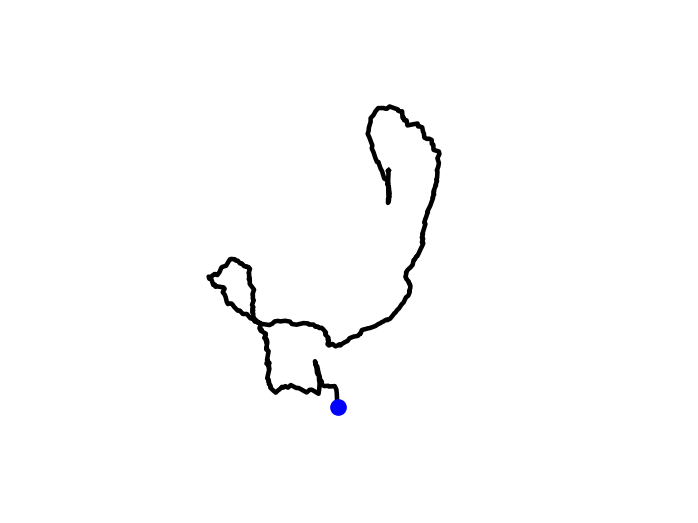

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
curve.plot(ax,root_args={"c":"blue","s":100},line_args={"c":"black","lw":3});
ax.view_init(azim=azim,elev=elev)
ax.axis("off");
plt.tight_layout();

## Computing intrinsic dimensions across scales

In [6]:
maxscale = 200
scales = np.arange(1,maxscale+1,5)
print("scale list:",scales)
scale_table = curves.RadiusScaleTable(curve,maxscale)
dim_results = {}
for scale in scales:
    sig_c, delta_sig = scale_table.compute_scales_from_radius(scale)
    dim_results[scale] = curve.decompose_intrinsicdim(sig_c,delta_sig)

scale list: [  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
 181 186 191 196]


<IPython.core.display.Javascript object>


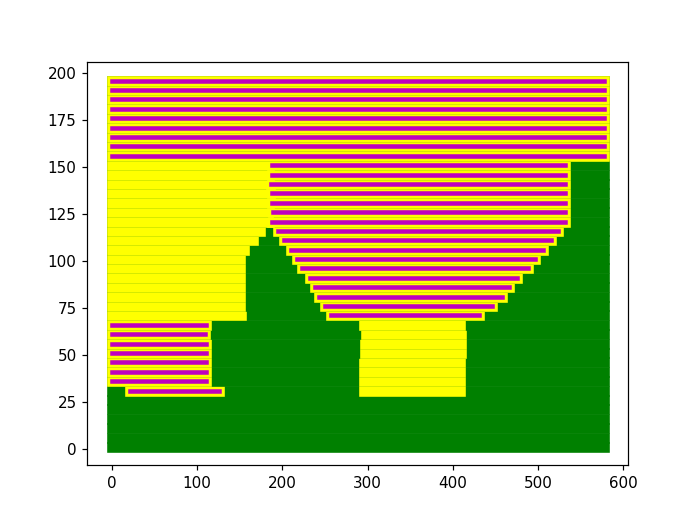

In [7]:
# scale space table
fig = plt.figure()
ax = fig.add_subplot(111)
for key,val in dim_results.items():
    ax.plot(range(curve.coors.shape[0]),[key for _ in range(curve.coors.shape[0])],c="green",lw=7)
    for plane in val["planeline_pred"]:
        ax.plot(range(plane[0],plane[1]+1),[key for _ in range(plane[1]-plane[0]+1)],c="yellow",lw=7)
    for line in val["line_pred"]:
        ax.plot(range(line[0],line[1]+1),[key for _ in range(line[1]-line[0]+1)],c="m",lw=3);

## Examples at some scales

16
{'planeline_pred': [], 'line_pred': []}


<IPython.core.display.Javascript object>


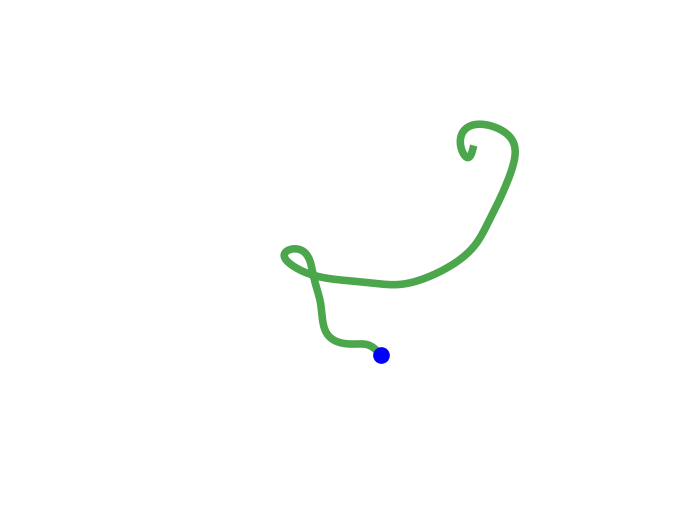

In [8]:
scale = scales[3]
print(scale)
sig_c, delta_sig = scale_table.compute_scales_from_radius(scale)
dim = curve.decompose_intrinsicdim(sig_c,delta_sig)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
curve.plot_intrinsicdim(ax);
ax.view_init(azim=azim,elev=elev)
ax.axis("off");
plt.tight_layout();

56
{'planeline_pred': [[0, 110], [297, 409]], 'line_pred': [[0, 110]]}


<IPython.core.display.Javascript object>


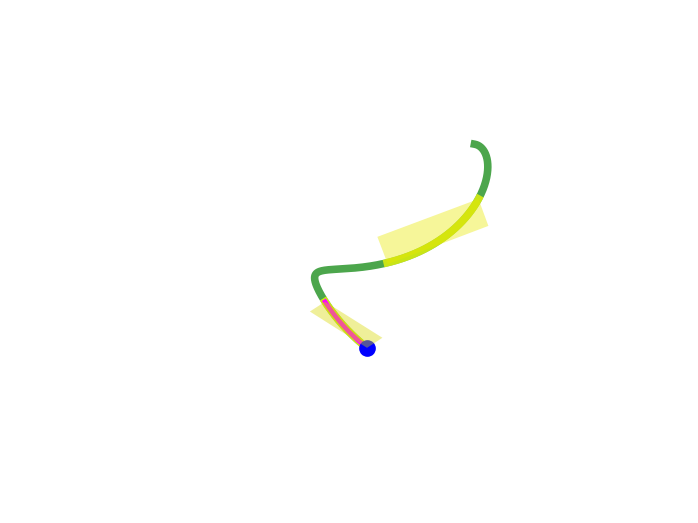

In [9]:
scale = scales[11]
print(scale)
sig_c, delta_sig = scale_table.compute_scales_from_radius(scale)
dim = curve.decompose_intrinsicdim(sig_c,delta_sig)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
curve.plot_intrinsicdim(ax);
ax.view_init(azim=azim,elev=elev)
ax.axis("off");
plt.tight_layout();

126
{'planeline_pred': [[0, 183], [189, 531]], 'line_pred': [[189, 531]]}


<IPython.core.display.Javascript object>


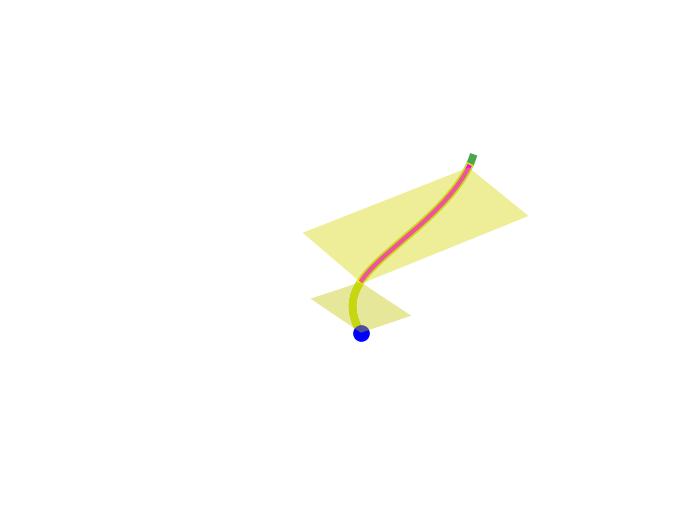

In [10]:
scale = scales[25]
print(scale)
sig_c, delta_sig = scale_table.compute_scales_from_radius(scale)
dim = curve.decompose_intrinsicdim(sig_c,delta_sig)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
curve.plot_intrinsicdim(ax);
ax.view_init(azim=azim,elev=elev)
ax.axis("off");
plt.tight_layout();

176
{'planeline_pred': [[0, 577]], 'line_pred': [[0, 577]]}


<IPython.core.display.Javascript object>


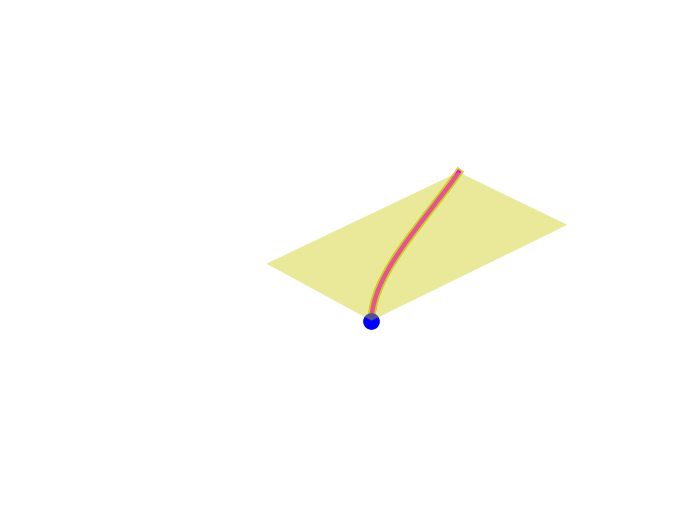

In [11]:
scale = scales[35]
print(scale)
sig_c, delta_sig = scale_table.compute_scales_from_radius(scale)
dim = curve.decompose_intrinsicdim(sig_c,delta_sig)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
curve.plot_intrinsicdim(ax);
ax.view_init(azim=azim,elev=elev)
ax.axis("off");
plt.tight_layout();

## Computing local 3d scales

In [8]:
local_scale = curve.compute_local_3d_scale(scales)

<IPython.core.display.Javascript object>


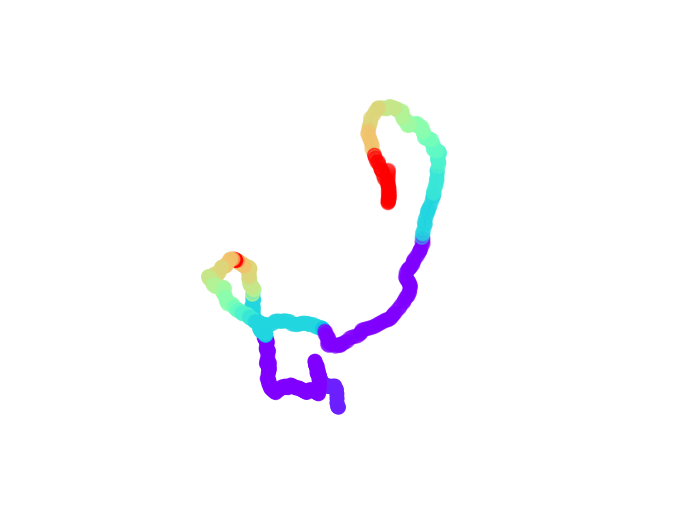

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
_, point_pl, _ = curve.plot(ax,point_args={"c":local_scale,"cmap":"rainbow","s":80})
# fig.colorbar(point_pl,shrink=0.5);
ax.view_init(azim=azim,elev=elev)
ax.axis("off");
plt.tight_layout();

<IPython.core.display.Javascript object>


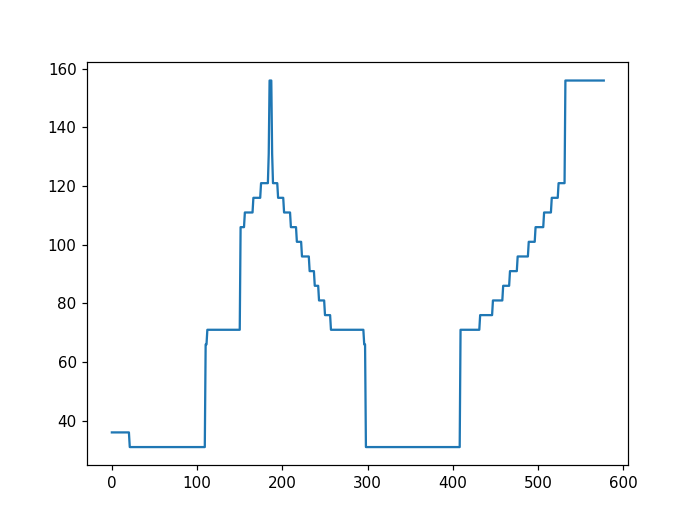

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(local_scale)),local_scale)

### Color map

<IPython.core.display.Javascript object>


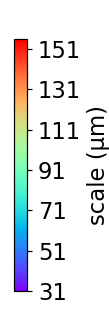

In [14]:
lower = min(local_scale)
upper = max(local_scale) # upper scale 

# custom colorbar
mycmp = cm.get_cmap('rainbow')
fig, ax = plt.subplots(figsize=(1, 3))
fig.subplots_adjust(right=0.25)

norm = mpl.colors.Normalize(vmin=lower, vmax=upper)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=mycmp,
                                norm=norm,
                                orientation='vertical')

cb1.set_ticks(range(lower,upper+1,20));
ax.set_yticklabels(cb1.get_ticks(),fontsize=15);
cb1.set_label('scale (µm)',fontsize=15);

# Intrinsic decompositions across sigma values

We illustrate how the dimensions of a curve are decomposed when it is smoothed out by increasing values of sigma, i.e. width of a Gaussian function (FigS4). Then, the local 3D scale can be derived from those decompositions.

## Reading neuron

In [5]:
# Initialize swc importer
filepath = "../data/validation/celltypes/swc/"
f = swc.SWC(filepath,recursive=True)
print("nb. of imported neurons:",len(f.get_neuron_id()))

nb. of imported neurons: 16


Neuron name: Badea2011Fig2Ca-R.CNG
Neuron ID: 9
Spine branch:
>Number of nodes = 75
>Length = 482.647298358928
>Original sampling size = 6


<IPython.core.display.Javascript object>


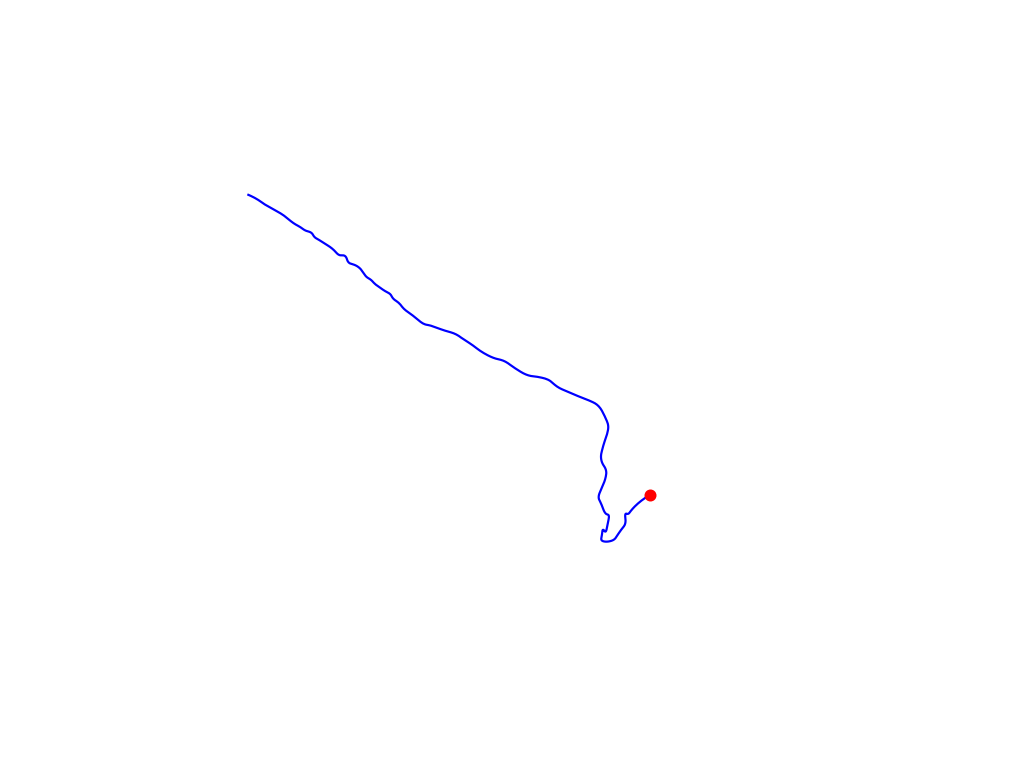

In [6]:
# Select a neuron
neuname = "Badea2011Fig2Ca-R.CNG"
neuid = f.get_neuron_id()[neuname]
print('Neuron name:',neuname)
print("Neuron ID:",neuid)

# Get neuron from ID
neuron = f.get_neurons(neuid)

# Get spine
spine_nodes = neuron.compute_spine()
spine = neuron.to_curve(spine_nodes) # create curve from spine nodes
spine_nbnodes = spine.nb_of_points
spine_length = spine.compute_length()
print('Spine branch:')
print('>Number of nodes =',spine_nbnodes)
print('>Length =',spine_length)
print('>Original sampling size =',int(spine_length/spine_nbnodes))

# Resampling spine
spine = spine.resample(unit_length=1,spline_order=2)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
spine.plot(ax);
para = mypl.fix_equal_axis(spine.coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 8
ax.axis('off');

fig.savefig('../localfiles/figures/validation/local_scale_from_sigmalist/badea_spine.png',dpi=300)

## Compute dimensional decomposition table 

In [7]:
# Sigma list
step = 3
sigmalst = range(1,120+step,step)
print("List of sigma: ",list(sigmalst))

# Intrinsic decomposition over sigma values
R = np.ones((len(sigmalst),spine.nb_of_points),dtype=np.uint)*3
print("Result matrix shape: ",R.shape)
dim_results = {}
for i in range(len(sigmalst)):
    sigma = sigmalst[i]
    res = spine.decompose_intrinsicdim(sigma)
    dim_results[sigma] = res
    for plane in res['planeline_pred']:
        R[i,plane[0]:plane[1]+1] = 2
    for line in res['line_pred']:
        R[i,line[0]:line[1]+1] = 1
        
# Local 3D scale
Mask3D = (R==3)
L3ds = [sigmalst[np.argwhere(Mask3D[:,i]==False).flatten()[0]] for i in range(Mask3D.shape[1])]
# print(L3ds)

List of sigma:  [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121]
Result matrix shape:  (41, 483)


<IPython.core.display.Javascript object>


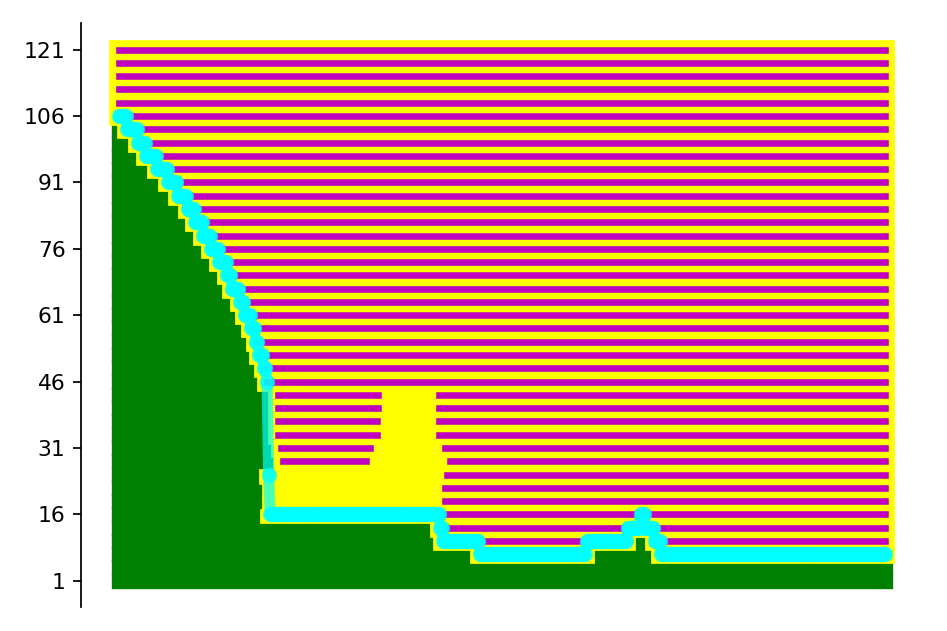

In [17]:
# Scale space table
w1, w2 = 7,3
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
for key,val in dim_results.items():
    ax.plot(range(spine.coors.shape[0]),[key for _ in range(spine.coors.shape[0])],c="green",lw=w1)
    for plane in val["planeline_pred"]:
        ax.plot(range(plane[0],plane[1]+1),[key for _ in range(plane[1]-plane[0]+1)],c="yellow",lw=w1+2)
    for line in val["line_pred"]:
        ax.plot(range(line[0],line[1]+1),[key for _ in range(line[1]-line[0]+1)],c="m",lw=w2);
        
ax.plot(range(spine.coors.shape[0]),L3ds,
        '-o',c='cyan',
        ms=6,lw=w2+2,alpha=0.7);
ax.set_yticks(sigmalst[::5]);
ax.set_xticks([]);
ax.spines['bottom'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
# ax.spines['left'].set_visible(False);
plt.tight_layout();

fig.savefig('../localfiles/figures/validation/local_scale_from_sigmalist/l3ds_table.png',dpi=500)

## Some illustrations

### Sigma = 1

{'planeline_pred': [], 'line_pred': []}


<IPython.core.display.Javascript object>


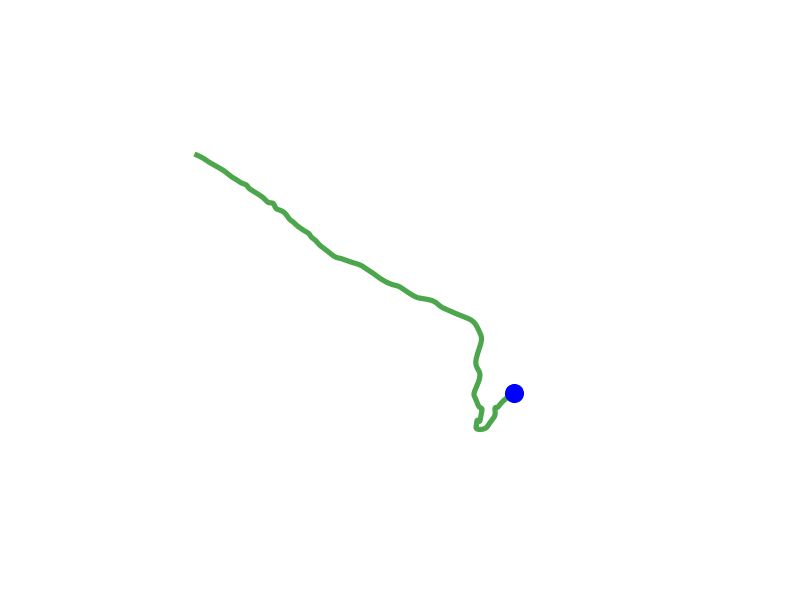

In [278]:
# Test a specific sigma
sig_c = 1
dim = spine.decompose_intrinsicdim(sig_c=sig_c)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
spine.plot_intrinsicdim(ax);

para = mypl.fix_equal_axis(spine.coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 8
ax.axis('off');

fig.savefig('../localfiles/figures/validation/local_scale_from_sigmalist/l3ds_sig_1.png',dpi=400)

### Sigma = 7

{'planeline_pred': [[227, 293], [341, 482]], 'line_pred': [[227, 293], [341, 482]]}


<IPython.core.display.Javascript object>


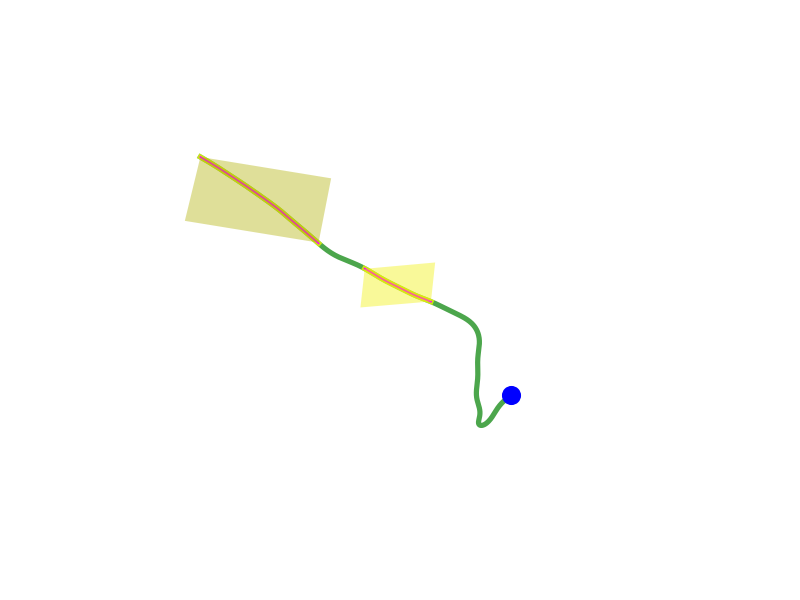

In [279]:
# Test a specific sigma
sig_c = 7
dim = spine.decompose_intrinsicdim(sig_c=sig_c)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
spine.plot_intrinsicdim(ax);

para = mypl.fix_equal_axis(spine.coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 8
ax.axis('off');

fig.savefig('../localfiles/figures/validation/local_scale_from_sigmalist/l3ds_sig_7.png',dpi=400)

### Sigma = 25

{'planeline_pred': [[94, 482]], 'line_pred': [[206, 482]]}


<IPython.core.display.Javascript object>


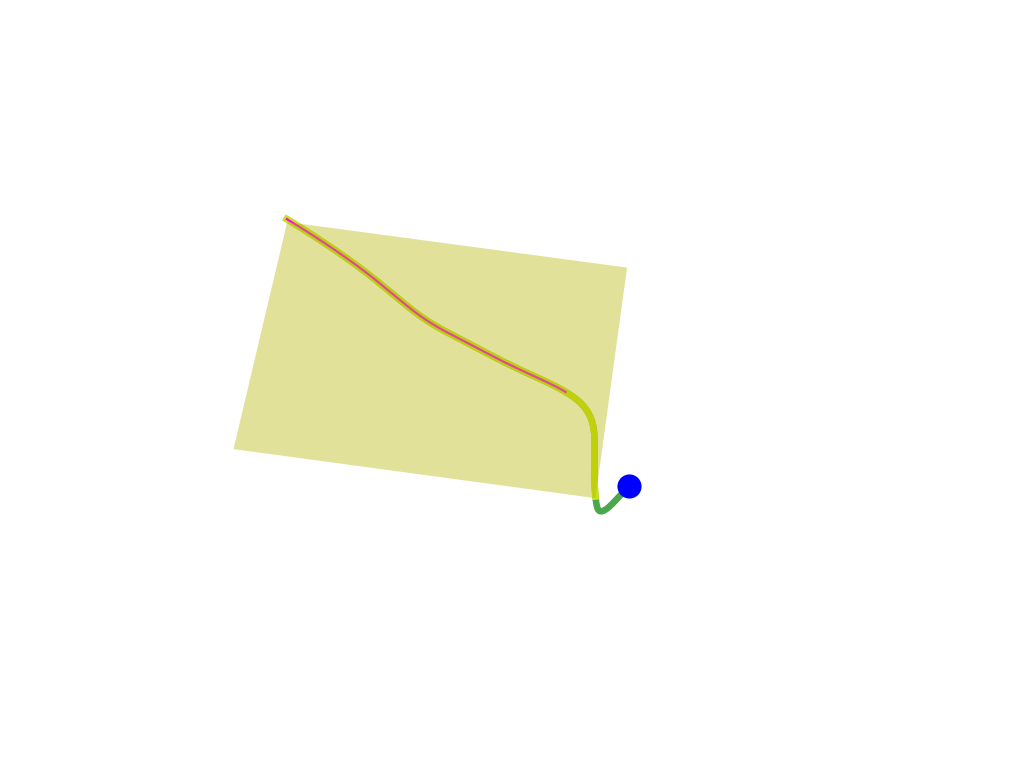

In [15]:
# Test a specific sigma
sig_c = 25
dim = spine.decompose_intrinsicdim(sig_c=sig_c)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
spine.plot_intrinsicdim(ax);

para = mypl.fix_equal_axis(spine.coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 9
ax.axis('off');

fig.savefig('../localfiles/figures/validation/local_scale_from_sigmalist/l3ds_sig_25.png',dpi=400)

### Sigma = 101

{'planeline_pred': [[9, 482]], 'line_pred': [[9, 482]]}


<IPython.core.display.Javascript object>


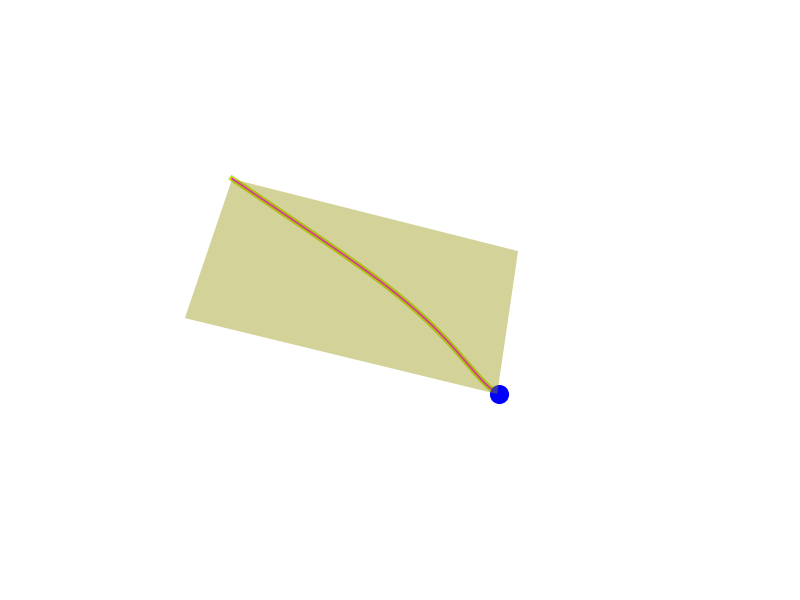

In [283]:
# Test a specific sigma
sig_c = 101
dim = spine.decompose_intrinsicdim(sig_c=sig_c)
print(dim)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
spine.plot_intrinsicdim(ax);

para = mypl.fix_equal_axis(spine.coors)
ax.set_xlim(para["xmin"],para["xmax"]);
ax.set_ylim(para["ymin"],para["ymax"]);
ax.set_zlim(para["zmin"],para["zmax"]);
ax.view_init(azim=-83,elev=57)
ax.dist = 8
ax.axis('off');

fig.savefig('../localfiles/figures/validation/local_scale_from_sigmalist/l3ds_sig_101.png',dpi=400)